# 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
auto = sm.datasets.get_rdataset('Auto', 'ISLR')

In [3]:
dauto = auto.data
dauto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [4]:
dauto['mpg'].median()

22.75

In [5]:
mpg01 = (dauto['mpg'] > dauto['mpg'].median()).astype('int')
mpg01

1      0
2      0
3      0
4      0
5      0
      ..
393    1
394    1
395    1
396    1
397    1
Name: mpg, Length: 392, dtype: int32

In [6]:
dauto_fixed = dauto.drop('mpg', axis=1)
dauto_fixed['mpg01'] = mpg01
dauto_fixed

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
3,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
4,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
5,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
394,4,97.0,52,2130,24.6,82,2,vw pickup,1
395,4,135.0,84,2295,11.6,82,1,dodge rampage,1
396,4,120.0,79,2625,18.6,82,1,ford ranger,1


## (b) Explore the data graphically in order to investigate the association between mpg01 and the other features.

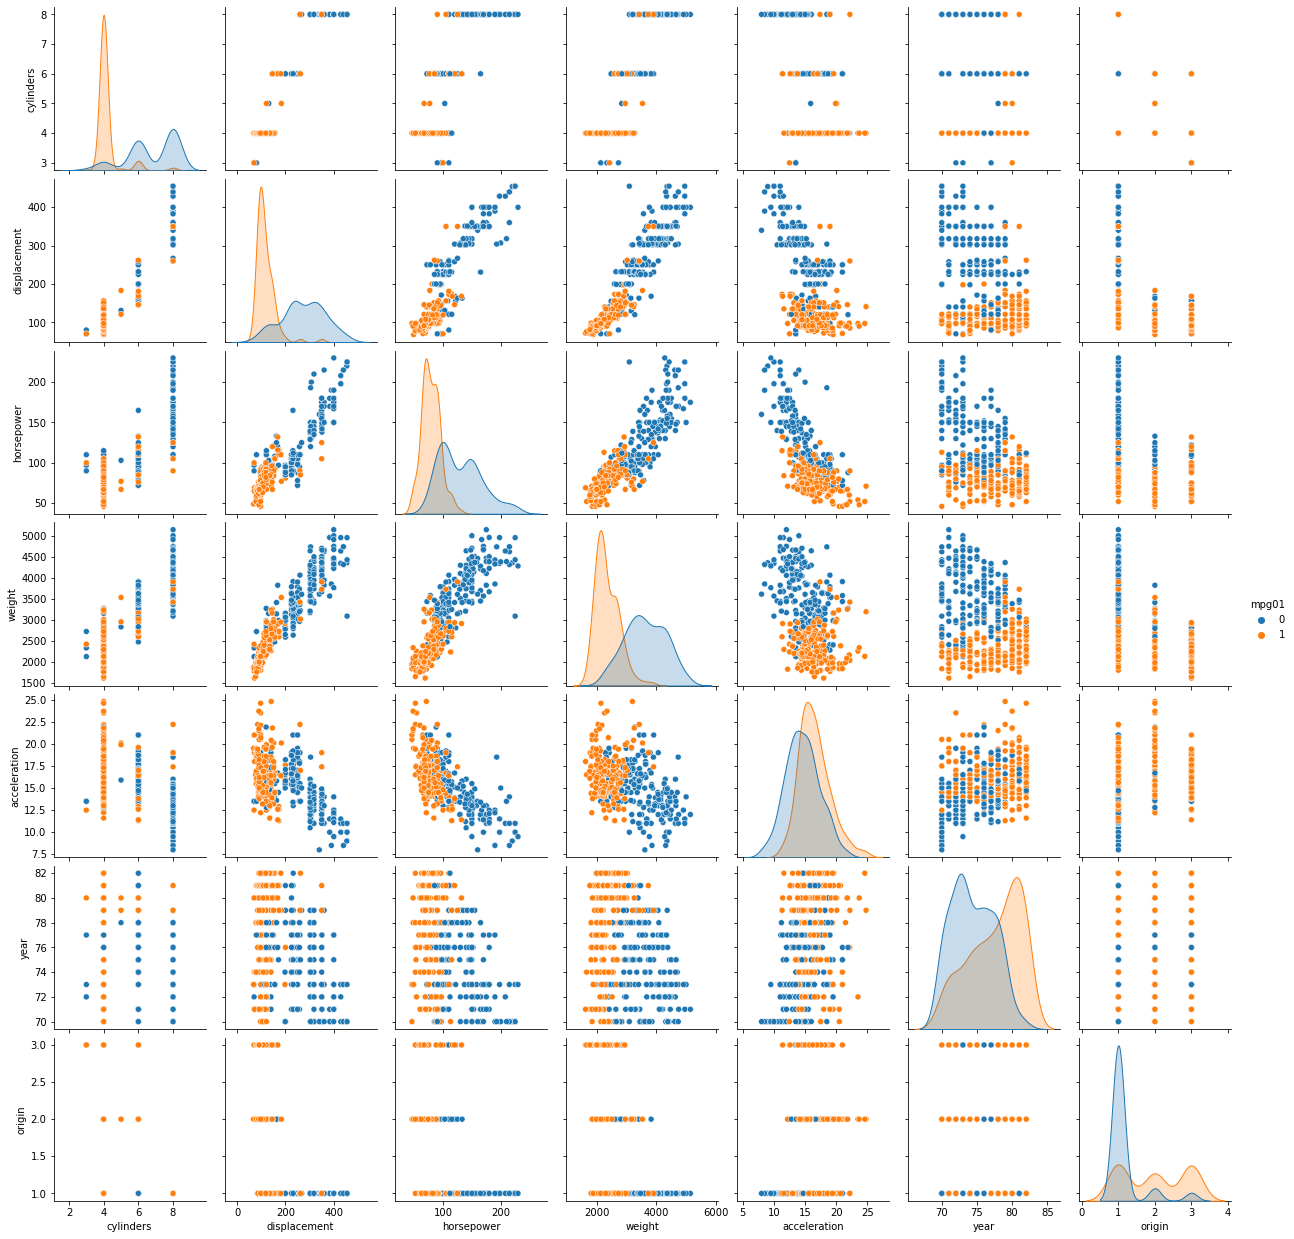

In [7]:
import seaborn as sns

sns.pairplot(dauto_fixed, hue = "mpg01");

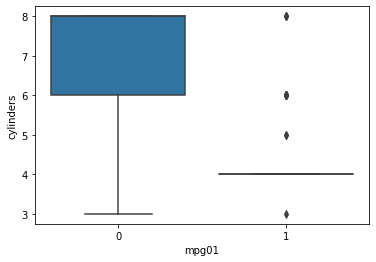

In [8]:
ax = sns.boxplot(x="mpg01", y="cylinders", data=dauto_fixed)

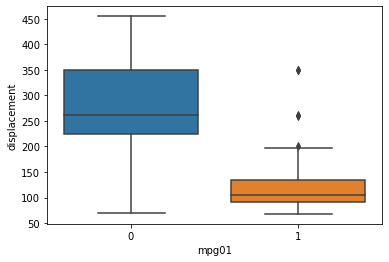

In [9]:
ax = sns.boxplot(x="mpg01", y="displacement", data=dauto_fixed)

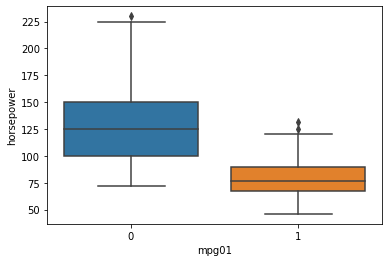

In [10]:
ax = sns.boxplot(x="mpg01", y="horsepower", data=dauto_fixed)

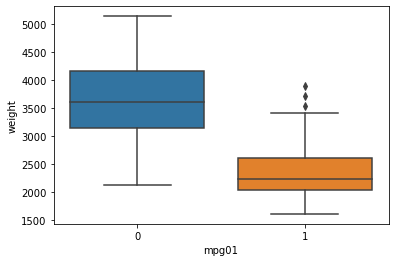

In [11]:
ax = sns.boxplot(x="mpg01", y="weight", data=dauto_fixed)

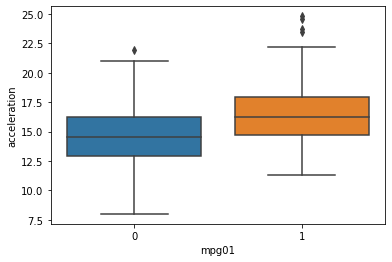

In [12]:
ax = sns.boxplot(x="mpg01", y="acceleration", data=dauto_fixed)

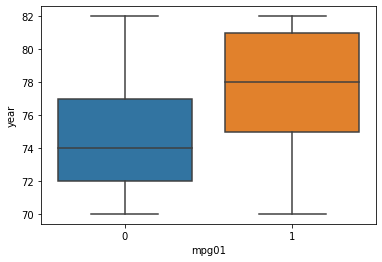

In [13]:
ax = sns.boxplot(x="mpg01", y="year", data=dauto_fixed)

### Which of the other features seem most likely to be useful in predicting mpg01? 

Looking the pairplot and the boxplot of each one, we can see that the most useful features are:

cylinders, displacement horsepower & weight

## (c) Split the data into a training set and a test set.

In [14]:
from sklearn.model_selection import train_test_split

np.random.seed(7)

X = dauto_fixed.drop(['name','mpg01'], axis=1)
y = dauto_fixed['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train[['cylinders', 'displacement', 'horsepower', 'weight']], y_train)

clf_lda.score(X_test[['cylinders', 'displacement', 'horsepower', 'weight']], y_test)


0.8987341772151899

In [16]:
# def confution matrix

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False
                      )
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    

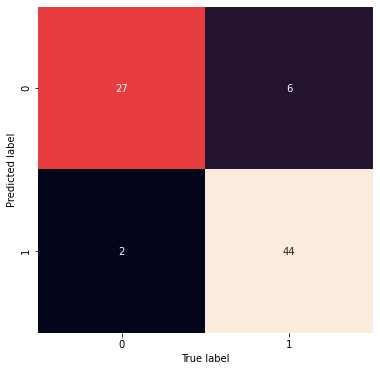

In [45]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 


prediction = clf_lda.predict(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  

plot_conf_mat(cm)

In [44]:
yhat

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

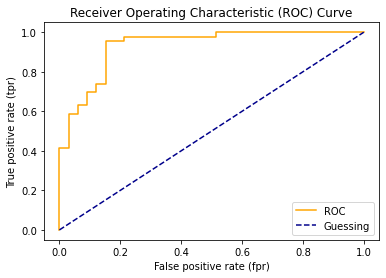

In [18]:
from sklearn.metrics import roc_curve

y_probs = clf_lda.predict_proba(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])
y_probs_positive = y_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0, 1], color = "darkblue", linestyle="--", label= "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)


## (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [19]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train[['cylinders', 'displacement', 'horsepower', 'weight']], y_train);

clf_qda.score(X_test[['cylinders', 'displacement', 'horsepower', 'weight']], y_test)

0.8987341772151899

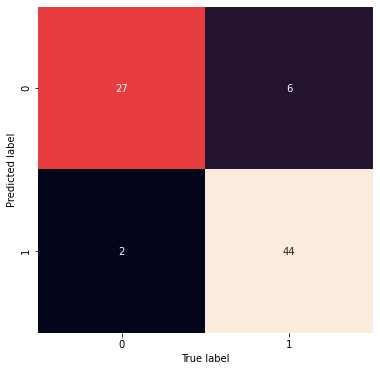

In [46]:
prediction = clf_qda.predict(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  

plot_conf_mat(cm)

## (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [29]:
X_train2 = sm.add_constant(X_train[['cylinders', 'displacement', 'horsepower', 'weight']])
y_train2 = y_train

clf_lr = sm.Logit(y_train2, X_train2).fit()
print(clf_lr.summary())

Optimization terminated successfully.
         Current function value: 0.265672
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  313
Model:                          Logit   Df Residuals:                      308
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Jan 2021   Pseudo R-squ.:                  0.6162
Time:                        19:06:08   Log-Likelihood:                -83.155
converged:                       True   LL-Null:                       -216.69
Covariance Type:            nonrobust   LLR p-value:                 1.373e-56
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.7877      1.973      6.480      0.000       8.920      16.655
cylinders       -0.2983

Test accuracy =  0.8987341772151899


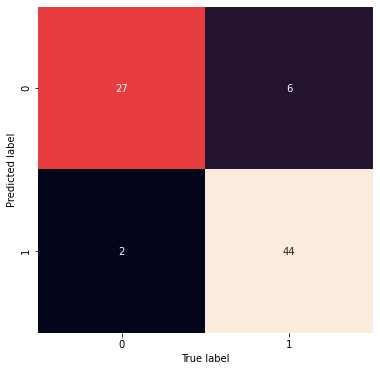

In [31]:
yhat = clf_lr.predict(sm.add_constant(X_test[['cylinders', 'displacement', 'horsepower', 'weight']]))

prediction = list(map(round, yhat)) 
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  

plot_conf_mat(cm)
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

## (g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 10)
clf_knn.fit(X_train[['cylinders', 'displacement', 'horsepower', 'weight']], y_train)

clf_knn.score(X_test[['cylinders', 'displacement', 'horsepower', 'weight']], y_test)

0.8987341772151899

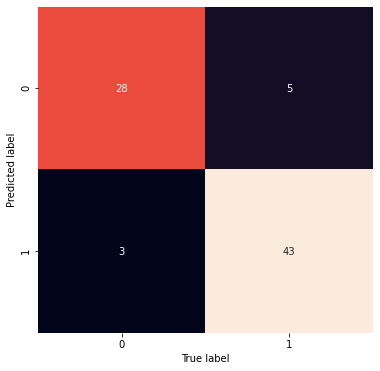

In [47]:
prediction = clf_knn.predict(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
 

plot_conf_mat(cm)

In [40]:
clf_knn1 = KNeighborsClassifier(n_neighbors = 50)
clf_knn1.fit(X_train[['cylinders', 'displacement', 'horsepower', 'weight']], y_train)

clf_knn1.score(X_test[['cylinders', 'displacement', 'horsepower', 'weight']], y_test)

0.8987341772151899

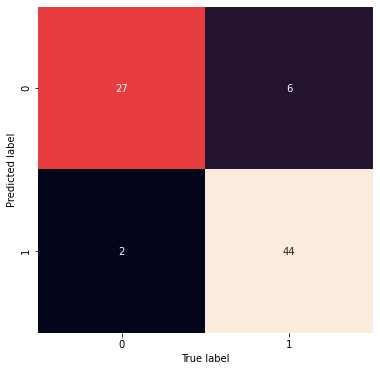

In [48]:
prediction = clf_knn1.predict(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
 

plot_conf_mat(cm)